In [3]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import pickle 
import matplotlib.transforms as mtransforms
from random import shuffle
from model_parameters import *
import statsmodels.api as sm

# HV function 
def heav(X):
    if X <= 0:
        return 0
    elif X>0:
        return 1

# 1. Initialized Population (20 cells in both mother & daughter)

In [2]:
collect_ = []

for type_ in ["M","D"]:
      
    for rep_ in range(20):
        
    
        """
        Model parameters
        """
        r_glucose =0.0077
        f_mean_glucose = 0.55
        f_CV_glucose = 0.1 
        cell_size = 0.65
        S0_mean = 0.60 
        S0_CV = 0.1 
        S0_log = np.random.lognormal(np.log(S0_mean),S0_CV,1)[0]
        SPO_mean = 0.07 
        SPO_CV = 0.03
        SPN_mean = 0.07 
        SPN_CV = 0.03 
    

        """
        Initial state at G1 phase
        """
        cln3=0
        whi5=1
        sbf=0
        cln2=0
        mbf=0
        clb5=0
        ori=0
        mcm1=0
        clb2G=0
        clb2M=0
        cdc20=0
        cdc5=0
        cdc14=0
        swi5=0
        cdh1=1
        sic1=1
        nrm1=0
        sac = 0
        spoc = 0
        spn_progress = 0
        spoc_progress = 0
        time = 0
        divide_status = ""
        tr_ = 500
        sac_event = [] # to track SAC checkpoint event
        node_name = ["cln3","whi5","sbf","cln2", "mbf","clb5","ori", "clb2G", "cdc5","mcm1","clb2M","sac", "cdc20","spoc","cdc14","swi5","cdh1","sic1","nrm1"]
        dat = [[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,"",cell_size,S0_log,"",0,0]]



        for j in range(tr_):
            
            """
            W function of Boolean variables
            """
            cln3_sum = (cell_size >= S0_log)
            whi5_sum = k60 + k61*cdc14 - k62*cln2 - k63*cln3 
            sbf_sum =  k45 + k47*clb5 + k48*cln2 + k49*cln3 - k46*clb2G - k50*whi5 
            cln2_sum = k30 + k31*mbf + k32*sbf 
            mbf_sum  = k33 + k35*clb5 + k36*cln2 + k37*cln3 - k34*clb2G - k38*nrm1 
            clb5_sum = k25 + k27*mbf + k28*sbf - k29*sic1 - k26*cdc20 
            clb2G_sum = k19 - k20*cdh1 - k21*sic1
            clb2M_sum =  k22 + k24*mcm1 - k23*cdc20
            mcm1_sum = k39 + k41*clb2M + k40*clb2G
            cdc5_sum = k9 + k11*clb2G + k12*clb2M - k10*cdh1 
            cdc20_sum =  k6 + k7*mcm1 - k8*sac 
            cdc14_sum = k1 + k2*cdc5 - k5*spoc - k4*sac - k3*clb2M
            swi5_sum =  k57 + k58*cdc14 + k59*mcm1 
            cdh1_sum = k13 + k14*cdc14 - k16*clb2M - k17*clb5 - k18*cln2 - k15*clb2G
            sic1_sum = k51 + k56*swi5 - k53*clb2M - k54*clb5 - k55*cln2 - k52*clb2G
            nrm1_sum = k42 - k43*cdh1 + k44*mbf


            """
            Binarizing the W function by Heaviside function
            """
            cln3_new = heav(cln3_sum)
            whi5_new = heav(whi5_sum)
            sbf_new = heav(sbf_sum)
            cln2_new = heav(cln2_sum)
            mbf_new = heav(mbf_sum)
            clb5_new = heav(clb5_sum)
            mcm1_new = heav(mcm1_sum)
            clb2M_new = heav(clb2M_sum)
            cdc20_new = heav(cdc20_sum) 
            cdc5_new = heav(cdc5_sum)
            cdc14_new = heav(cdc14_sum) 
            swi5_new = heav(swi5_sum)
            cdh1_new = heav(cdh1_sum)
            sic1_new = heav(sic1_sum)
            clb2G_new = heav(clb2G_sum)
            nrm1_new = heav(nrm1_sum)



            """
            Which variables change?
            """

            cln3_update = cln3_new - cln3
            whi5_update = whi5_new - whi5
            sbf_update =  sbf_new - sbf
            cln2_update = cln2_new - cln2
            mbf_update  = mbf_new - mbf
            clb5_update = clb5_new - clb5
            mcm1_update = mcm1_new - mcm1
            clb2M_update = clb2M_new - clb2M
            cdc20_update = cdc20_new - cdc20
            cdc5_update = cdc5_new - cdc5
            cdc14_update = cdc14_new - cdc14
            swi5_update = swi5_new - swi5
            cdh1_update = cdh1_new - cdh1
            sic1_update = sic1_new - sic1
            clb2G_update = clb2G_new - clb2G
            nrm1_update = nrm1_new - nrm1



            """
            Selecting a single variable to change with a uniform asynchronous update
            """

            x1 = abs(cln3_update)
            x2 = x1 + abs(whi5_update)
            x3 = x2 + abs(sbf_update)
            x4 = x3 + abs(cln2_update)
            x5 = x4 + abs(mbf_update)
            x6 = x5 + abs(clb5_update)
            x7 = x6 + abs(mcm1_update)
            x8 = x7 + abs(clb2M_update)
            x9 = x8 + abs(cdc20_update)
            x10 = x9 + abs(cdc5_update)
            x11 = x10 + abs(cdc14_update)
            x12 = x11 + abs(swi5_update)
            x13 = x12 + abs(cdh1_update)
            x14 = x13 + abs(sic1_update)
            x15 = x14 + abs(clb2G_update)
            x16 = x15 + abs(nrm1_update)

            """
            if no state changes, set x17 to 1
            """
            
            if x16 == 0:
                x17 = 1
            else:
                x17 = x16

            sel = random.uniform(0,1)*x17

            y1 = (sel<=x1)
            y2 = (sel>x1)&(sel<=x2)
            y3 = (sel>x2)&(sel<=x3)
            y4 = (sel>x3)&(sel<=x4)
            y5 = (sel>x4)&(sel<=x5)
            y6 = (sel>x5)&(sel<=x6)
            y7 = (sel>x6)&(sel<=x7)
            y8 = (sel>x7)&(sel<=x8)
            y9 = (sel>x8)&(sel<=x9)
            y10 = (sel>x9)&(sel<=x10)
            y11 = (sel>x10)&(sel<=x11)
            y12 = (sel>x11)&(sel<=x12)
            y13 = (sel>x12)&(sel<=x13)
            y14 = (sel>x13)&(sel<=x14)
            y15 = (sel>x14)&(sel<=x15)
            y16 = (sel>x15)&(sel<=x16)
            y17 = (sel>x16)


            """
            Updating time
            """
            
            delt = np.random.gamma(3,0.3)
            time = time + delt
        
            """
            Updating size
            """

            if(clb2G == 1 and clb2G_new == 0 and y15 == 1):

                f = np.random.lognormal(np.log(f_mean_glucose),f_CV_glucose, 1)[0]
                S0_log = np.random.lognormal(np.log(S0_mean),S0_CV,1)[0]
                if type_ == "M":
                    cell_size = cell_size*math.exp(r_glucose*delt) * f
                elif type_ == "D":
                    cell_size = cell_size*math.exp(r_glucose*delt) * (1-f)
                divide_status = "divided !!!"
                                   
            else:
                
                cell_size = cell_size*math.exp(r_glucose*delt)
                divide_status = ""

            """
            Updating variables
            """

            cln3 = cln3 + cln3_update*y1
            whi5 = whi5 + whi5_update*y2
            sbf =  sbf + sbf_update*y3
            cln2 = cln2 + cln2_update*y4
            mbf =  mbf + mbf_update*y5
            clb5 = clb5 + clb5_update*y6
            mcm1 = mcm1 + mcm1_update*y7
            clb2M = clb2M + clb2M_update*y8
            cdc20 = cdc20 + cdc20_update*y9
            cdc5 = cdc5 + cdc5_update*y10
            cdc14 = cdc14 + cdc14_update*y11
            swi5 = swi5 + swi5_update*y12
            cdh1 = cdh1 + cdh1_update*y13
            sic1 = sic1 + sic1_update*y14
            clb2G = clb2G + clb2G_update*y15
            nrm1 = nrm1 + nrm1_update*y16
            
            """
            Switch cln3/whi5 based on cell size
            """

            if cell_size < S0_log:
                cln3,whi5 = 0,1
            else:
                cln3,whi5 = 1,0
                
            """
            ORI begin
            """
            if (clb5 == 1 or clb2M == 1 or clb2G == 1):
                ori = 1
            else:
                ori = 0

            """
            Spindle Assembly Checkpoint
            """
            if (ori == 1 and spn_progress < 1):
                sac=1
            else:
                sac=0

            if clb2M== 1:
                num = np.random.lognormal(np.log(SPN_mean),SPN_CV,1)[0]
                spn_progress += num
                if spn_progress >= 1:
                    spn_progress = 1
            elif clb2G_update == -1 and clb2G == 0 and y15 == 1:
                spn_progress = 0
                
            """
            Checking when SPoC checkpoint will be initiated.
            """

            # SPoC Checkpoint
            # 10 = the starting time step for monitoring SAC checkpoint (10 is arbitrary)
            if j >= 10:
                t_previous = sac_event[j-2]
                t_current = sac_event[j-1]
                del_sac = t_current-t_previous
            sac_event.append(sac)

            """
            SPoC Checkpoint
            """
            
            if (cdc20 == 1 and del_sac == -1 and spoc_progress < 1):
                spoc = 1
            elif spoc_progress >= 1:
                spoc = 0

            if(cdc20 == 1):
                num = np.random.lognormal(np.log(SPO_mean),SPO_CV,1)[0]
                spoc_progress += num
                if spoc_progress >= 1:
                    spoc_progress = 1
            else:
                spoc_progress = 0
                spoc_ = ""
                
            res_ = [cln3,whi5,sbf,cln2,mbf,clb5,ori,clb2G,cdc5,mcm1,clb2M,
                    sac,cdc20,spoc,cdc14,swi5,cdh1,sic1,nrm1,time,
                    cell_size,S0_log,divide_status,spn_progress,spoc_progress]    
            res_df = pd.DataFrame(res_).T
            res_df.columns = node_name+["time","cell_size","critical_size","divide","SPN","SPOC"]
            res_df["sim.who"] = type_
            res_df["ID"] = rep_
            
            if j >= tr_-1:
                
                collect_.append(res_df)
            
            

In [26]:
"""
init_pop = pd.concat(collect_)
init_pop_1 = init_pop[node_name+["cell_size","SPN","SPOC","sim.who"]]
init_pop_1["last_DIV"] = 0
init_pop_1["last_TG1"] = 0
init_pop_1["last_size_at_birth"] = 0
init_pop_1["Trex"] = 0
init_pop_1.to_csv("../data/initial.csv")
"""
init_pop_1 = pd.read_csv("../data/initial.csv").iloc[:,1:]

# 2. Collecting the summary statistics from these 40 cells

In [4]:
index_cell = 0
"""
mother
"""
join_M = []
Division_time_M = []
tbud_M = []
tG1_M = []
birth_size_M = []
"""
daugher
"""
join_D = []
Division_time_D = []
tbud_D = []
tG1_D = []
birth_size_D = []


r_glucose =0.0077
f_mean_glucose = 0.55
f_CV_glucose = 0.1 
cell_size = 0.65
S0_mean = 0.60 
S0_CV = 0.1 
S0_log = np.random.lognormal(np.log(S0_mean),S0_CV,1)[0]
SPO_mean = 0.07 
SPO_CV = 0.03
SPN_mean = 0.07 
SPN_CV = 0.03 
S0_log = np.random.lognormal(np.log(S0_mean),S0_CV,1)[0]

while True:
   
    
    if index_cell >= init_pop_1.shape[0]:
        break

        
    """
    initial state
    """
    node_name = ["cln3","whi5","sbf","cln2", "mbf","clb5","ori", "clb2G", "cdc5","mcm1","clb2M","sac", "cdc20","spoc","cdc14","swi5","cdh1","sic1","nrm1"]
    init_state = np.array(init_pop_1.iloc[index_cell,:19].tolist())
    for n, val in enumerate(init_state):
        globals()[node_name[n]] = int(val)
        
         
    """
    size and process
    """
    cell_size = init_pop_1.iloc[index_cell,19]
    spn_progress = init_pop_1.iloc[index_cell,20]
    spoc_progress = init_pop_1.iloc[index_cell,21]
    type_ = init_pop_1.iloc[index_cell,22]
    last_tdiv = init_pop_1.iloc[index_cell,23]
    last_G1 = init_pop_1.iloc[index_cell,24]
    last_size_at_birth = init_pop_1.iloc[index_cell,25]
    tr = init_pop_1.iloc[index_cell,26]
    tr_max=500

    while True:
        
        if tr >= tr_max:
            break

        """
        W function of Boolean variables
        """
        cln3_sum = (cell_size >= S0_log)
        whi5_sum = k60 + k61*cdc14 - k62*cln2 - k63*cln3 
        sbf_sum =  k45 + k47*clb5 + k48*cln2 + k49*cln3 - k46*clb2G - k50*whi5 
        cln2_sum = k30 + k31*mbf + k32*sbf 
        mbf_sum  = k33 + k35*clb5 + k36*cln2 + k37*cln3 - k34*clb2G - k38*nrm1 
        clb5_sum = k25 + k27*mbf + k28*sbf - k29*sic1 - k26*cdc20 
        clb2G_sum = k19 - k20*cdh1 - k21*sic1
        clb2M_sum =  k22 + k24*mcm1 - k23*cdc20
        mcm1_sum = k39 + k41*clb2M + k40*clb2G
        cdc5_sum = k9 + k11*clb2G + k12*clb2M - k10*cdh1 
        cdc20_sum =  k6 + k7*mcm1 - k8*sac 
        cdc14_sum = k1 + k2*cdc5 - k5*spoc - k4*sac - k3*clb2M
        swi5_sum =  k57 + k58*cdc14 + k59*mcm1 
        cdh1_sum = k13 + k14*cdc14 - k16*clb2M - k17*clb5 - k18*cln2 - k15*clb2G
        sic1_sum = k51 + k56*swi5 - k53*clb2M - k54*clb5 - k55*cln2 - k52*clb2G
        nrm1_sum = k42 - k43*cdh1 + k44*mbf



        """
        Binarizing by Heaviside function
        """
        cln3_new = heav(cln3_sum)
        whi5_new = heav(whi5_sum)
        sbf_new = heav(sbf_sum)
        cln2_new = heav(cln2_sum)
        mbf_new = heav(mbf_sum)
        clb5_new = heav(clb5_sum)
        mcm1_new = heav(mcm1_sum)
        clb2M_new = heav(clb2M_sum)
        cdc20_new = heav(cdc20_sum) 
        cdc5_new = heav(cdc5_sum)
        cdc14_new = heav(cdc14_sum) 
        swi5_new = heav(swi5_sum)
        cdh1_new = heav(cdh1_sum)
        sic1_new = heav(sic1_sum)
        clb2G_new = heav(clb2G_sum)
        nrm1_new = heav(nrm1_sum)



        """
        Which protein is changed ?
        """
        cln3_update = cln3_new - cln3
        whi5_update = whi5_new - whi5
        sbf_update =  sbf_new - sbf
        cln2_update = cln2_new - cln2
        mbf_update  = mbf_new - mbf
        clb5_update = clb5_new - clb5
        mcm1_update = mcm1_new - mcm1
        clb2M_update = clb2M_new - clb2M
        cdc20_update = cdc20_new - cdc20
        cdc5_update = cdc5_new - cdc5
        cdc14_update = cdc14_new - cdc14
        swi5_update = swi5_new - swi5
        cdh1_update = cdh1_new - cdh1
        sic1_update = sic1_new - sic1
        clb2G_update = clb2G_new - clb2G
        nrm1_update = nrm1_new - nrm1



        """
        Propensity Function
        """
        x1 = abs(cln3_update)
        x2 = x1 + abs(whi5_update)
        x3 = x2 + abs(sbf_update)
        x4 = x3 + abs(cln2_update)
        x5 = x4 + abs(mbf_update)
        x6 = x5 + abs(clb5_update)
        x7 = x6 + abs(mcm1_update)
        x8 = x7 + abs(clb2M_update)
        x9 = x8 + abs(cdc20_update)
        x10 = x9 + abs(cdc5_update)
        x11 = x10 + abs(cdc14_update)
        x12 = x11 + abs(swi5_update)
        x13 = x12 + abs(cdh1_update)
        x14 = x13 + abs(sic1_update)
        x15 = x14 + abs(clb2G_update)
        x16 = x15 + abs(nrm1_update)


        """
        if state isn't change, set to G1 state (x14 = 1)
        """
        if x16 == 0:
            x17 = 1
        else:
            x17 = x16


        """
        Selecting a single variable to change with a uniform asynchronous update
        """
        sel = random.uniform(0,1)*x17
        y1 = (sel<=x1)
        y2 = (sel>x1)&(sel<=x2)
        y3 = (sel>x2)&(sel<=x3)
        y4 = (sel>x3)&(sel<=x4)
        y5 = (sel>x4)&(sel<=x5)
        y6 = (sel>x5)&(sel<=x6)
        y7 = (sel>x6)&(sel<=x7)
        y8 = (sel>x7)&(sel<=x8)
        y9 = (sel>x8)&(sel<=x9)
        y10 = (sel>x9)&(sel<=x10)
        y11 = (sel>x10)&(sel<=x11)
        y12 = (sel>x11)&(sel<=x12)
        y13 = (sel>x12)&(sel<=x13)
        y14 = (sel>x13)&(sel<=x14)
        y15 = (sel>x14)&(sel<=x15)
        y16 = (sel>x15)&(sel<=x16)
        y17 = (sel>x16)


        """
        update time
        """
        delt = np.random.gamma(3,0.3)
        tr = tr + delt
    

        """
        G1 EVENT
        """
        if (sbf == 0 and sbf_new == 1 and y3 == 1) or (mbf == 0 and mbf_new == 1 and y5 == 1):
            if last_tdiv > 0:
                if type_ == "M":
                    tG1_M.append(tr - last_tdiv)
                    join_M.append([tr - last_tdiv,last_size_at_birth])
                    
                elif type_ == "D":
                    tG1_D.append(tr - last_tdiv)
                    join_D.append([tr - last_tdiv,last_size_at_birth])
                last_G1 = tr
        else:
            pass
            
        
        """
        DIVISION EVENT
        """
        if(clb2G == 1 and clb2G_new == 0 and y15 == 1):
            f = np.random.lognormal(np.log(f_mean_glucose),f_CV_glucose, 1)[0]            
            cell_size_D = cell_size*math.exp(r_glucose*delt) * (1-f)
            cell_size = cell_size*math.exp(r_glucose*delt) * f
            last_size_at_birth = cell_size
            
            """
            cell size
            """
            birth_size_D.append(cell_size_D)
            birth_size_M.append(cell_size)
    
            
            """
            division time
            """
            if last_tdiv > 0:
                if type_ == "M":
                    Division_time_M.append(tr-last_tdiv)
                elif type_ == "D":
                    Division_time_D.append(tr-last_tdiv)
            
            
            """
            from budding to division
            """
            if last_G1 > 0:
                if type_ == "M":
                    tbud_M.append(tr-last_G1)
                elif type_ == "D":
                    tbud_D.append(tr-last_G1)
            
            
            last_tdiv = tr
            S0_log  = np.random.lognormal(np.log(S0_mean),S0_CV,1)[0]
            type_ = "M"
            
            
            name_ = node_name+["cell_size","SPN","SPOC","sim.who","last_DIV","last_TG1","last_size_at_birth","Trex","cr"]
            list_ = [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,cell_size_D,0,0,"D",last_tdiv,last_G1,cell_size_D,tr,S0_log]
            name_dict = dict(zip(name_,list_))
            init_pop_1 = pd.concat([init_pop_1, pd.DataFrame([name_dict])])
        
        else:
            
            cell_size = cell_size*math.exp(r_glucose*delt)


        """
        Update variable based on Propensity Function
        """
        cln3 = cln3 + cln3_update*y1
        whi5 = whi5 + whi5_update*y2
        sbf =  sbf + sbf_update*y3
        cln2 = cln2 + cln2_update*y4
        mbf =  mbf + mbf_update*y5
        clb5 = clb5 + clb5_update*y6
        mcm1 = mcm1 + mcm1_update*y7
        clb2M = clb2M + clb2M_update*y8
        cdc20 = cdc20 + cdc20_update*y9
        cdc5 = cdc5 + cdc5_update*y10
        cdc14 = cdc14 + cdc14_update*y11
        swi5 = swi5 + swi5_update*y12
        cdh1 = cdh1 + cdh1_update*y13
        sic1 = sic1 + sic1_update*y14
        clb2G = clb2G + clb2G_update*y15
        nrm1 = nrm1 + nrm1_update*y16
        

        """
        Switch cln3/whi5 based on cell size
        """

        if cell_size < S0_log:
            cln3,whi5 = 0,1
        else:
            cln3,whi5 = 1,0
                

        """
        ORI begin
        """
        if (clb5 == 1 or clb2M == 1 or clb2G == 1):
            ori = 1
        else:
            ori = 0


        """
        SAC Checkpoint
        """
        if (ori == 1 and spn_progress < 1):
            sac=1
        else:
            sac=0


        if (clb2M == 1 and sac == 1):
            num = np.random.lognormal(np.log(SPN_mean),SPN_CV,1)[0]
            spn_progress += num
            if spn_progress >= 1:
                spn_progress = 1
                
        elif clb2G_update == -1 and clb2G == 0 and y15 == 1:
            spn_progress = 0


        """
        SPoC Checkpoint
        """

        if (cdc20 == 1 and spoc_progress < 1):
            spoc = 1
        elif spoc_progress >= 1:
            spoc = 0

        if(cdc20 == 1):
            num = np.random.lognormal(np.log(SPO_mean),SPO_CV,1)[0]
            spoc_progress += num
            if spoc_progress >= 1:
                spoc_progress = 1
        else:
            spoc_progress = 0
            spoc_ = ""
       
 
    index_cell += 1

# 3. Plotting simulation result

In [19]:
fl_ratio = 40/np.mean(np.array(birth_size_M))
size_M = np.array(birth_size_M)*fl_ratio

##### MEAN ###
Mean_size_M = np.mean(size_M)
Mean_tG1_M = np.mean(tG1_M)
Mean_tbud_M = np.mean(tbud_M)
Mean_Division_time_M = np.mean(Division_time_M)

#sim
stat_M_M_sim = [Mean_size_M,Mean_tG1_M,Mean_tbud_M,Mean_Division_time_M]
name_sim = ["Birth size","TG1","TBUD","TDIV"]
sim_mean_M = pd.DataFrame({"value":stat_M_M_sim,"name":name_sim})
sim_mean_M["type"] = "Simulation"
#expr
stat_M_M_expr = [40,16,72,87]
name_expr = ["Birth size","TG1","TBUD","TDIV"]
expr_mean_M = pd.DataFrame({"value":stat_M_M_expr,"name":name_expr})
expr_mean_M["type"] = "Experiment"

In [6]:
mean_plot = pd.concat([sim_mean_M,expr_mean_M])
mean_plot.to_csv("../data/Fig3A.csv")
mean_plot = pd.read_csv("../data/Fig3A.csv")

In [7]:
##### MEAN ###
cv_size_M = np.std(size_M)/Mean_size_M
cv_tG1_M = np.std(tG1_M)/Mean_tG1_M
cv_tbud_M = np.std(tbud_M)/Mean_tbud_M
cv_Division_time_M = np.std(Division_time_M)/Mean_Division_time_M

#sim
stat_cv_M_sim = [cv_size_M,cv_tG1_M,cv_tbud_M,cv_Division_time_M]
name_sim = ["Birth size","TG1","TBUD","TDIV"]
sim_cv_M = pd.DataFrame({"value":stat_cv_M_sim,"name":name_sim})
sim_cv_M["type"] = "Simulation"
#expr
stat_cv_M_expr = [0.18,0.5,0.17,0.14]
name_expr = ["Birth size","TG1","TBUD","TDIV"]
expr_cv_M = pd.DataFrame({"value":stat_cv_M_expr,"name":name_expr})
expr_cv_M["type"] = "Experiment"


In [8]:
cv_plot = pd.concat([sim_cv_M,expr_cv_M])
#cv_plot.to_csv("../data/Fig3B.csv")
#cv_plot =  pd.read_csv("../data/Fig3B.csv")

In [9]:
size_D = np.array(birth_size_D)*fl_ratio 

##### MEAN ###
Mean_size_D = np.mean(size_D)
Mean_tG1_D = np.mean(tG1_D)
print(Mean_tG1_D)
Mean_tbud_D = np.mean(tbud_D)
Mean_Division_time_D = np.mean(Division_time_D)

#sim
stat_D_D_sim = [Mean_size_D,Mean_tG1_D,Mean_tbud_D,Mean_Division_time_D]
name_sim = ["Birth size","TG1","TBUD","TDIV"]
sim_mean_D = pd.DataFrame({"value":stat_D_D_sim,"name":name_sim})
sim_mean_D["type"] = "Simulation"
#expr
stat_D_D_expr = [28,37,76,112]
name_expr = ["Birth size","TG1","TBUD","TDIV"]
expr_mean_D = pd.DataFrame({"value":stat_D_D_expr,"name":name_expr})
expr_mean_D["type"] = "Experiment"

58.014399670104716


In [10]:
mean_plot = pd.concat([sim_mean_D,expr_mean_D])
mean_plot.to_csv("../data/Fig3E.csv")
#mean_plot = pd.read_csv("../data/Fig3E.csv")

In [11]:
##### MEAN ###
cv_size_D = np.std(size_D)/Mean_size_D
cv_tG1_D = np.std(tG1_D)/Mean_tG1_D
cv_tbud_D = np.std(tbud_D)/Mean_tbud_D
cv_Division_time_D = np.std(Division_time_D)/Mean_Division_time_D

#sim
stat_cv_D_sim = [cv_size_D,cv_tG1_D,cv_tbud_D,cv_Division_time_D]
name_sim = ["Birth size","TG1","TBUD","TDIV"]
sim_cv_D = pd.DataFrame({"value":stat_cv_D_sim,"name":name_sim})
sim_cv_D["type"] = "Simulation"
#expr
stat_cv_D_expr = [0.2,0.5,0.2,0.22]
name_expr = ["Birth size","TG1","TBUD","TDIV"]
expr_cv_D = pd.DataFrame({"value":stat_cv_D_expr,"name":name_expr})
expr_cv_D["type"] = "Experiment"

In [12]:
cv_plot = pd.concat([sim_cv_D,expr_cv_D])
cv_plot.to_csv("../data/Fig3D.csv")
#cv_plot = pd.read_csv("../data/Fig3D.csv")

In [21]:
with open('../data/join_M1.pickle', 'wb') as handle:
    pickle.dump(join_M, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/join_D1.pickle', 'wb') as handle:
    pickle.dump(join_D, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
# Fig3 plot

In [4]:
mean_m_plot = pd.read_csv("../data/Fig3A.csv").iloc[:,1:].rename({"value":"mean"},axis=1).sort_values(by="name")
mean_m_plot["cat"] = "Mother"
cv_m_plot =  pd.read_csv("../data/Fig3B.csv").iloc[:,1:].rename({"value":"cv"},axis=1).sort_values(by="name")
cv_m_plot["cat"] = "Mother"
mean_d_plot = pd.read_csv("../data/Fig3E.csv").iloc[:,1:].rename({"value":"mean"},axis=1)
mean_d_plot["cat"] = "Daughter"
cv_d_plot = pd.read_csv("../data/Fig3D.csv").iloc[:,1:].rename({"value":"cv"},axis=1)
cv_d_plot["cat"] = "Daughter"
mdf = pd.concat([mean_m_plot,cv_m_plot],axis=1).iloc[:,[1,2,3,0,4]]
ddf = pd.concat([mean_d_plot,cv_d_plot],axis=1).iloc[:,[1,2,3,0,4]]
cdf = pd.concat([ddf,mdf]).query("cat == 'Mother'").sort_values(by="name")
cdf["sd"] = cdf["mean"]*cdf["cv"]
cdf_d = pd.concat([ddf,mdf]).query("cat != 'Mother'").sort_values(by="name")
cdf_d["sd"] = cdf_d["mean"]*cdf_d["cv"]

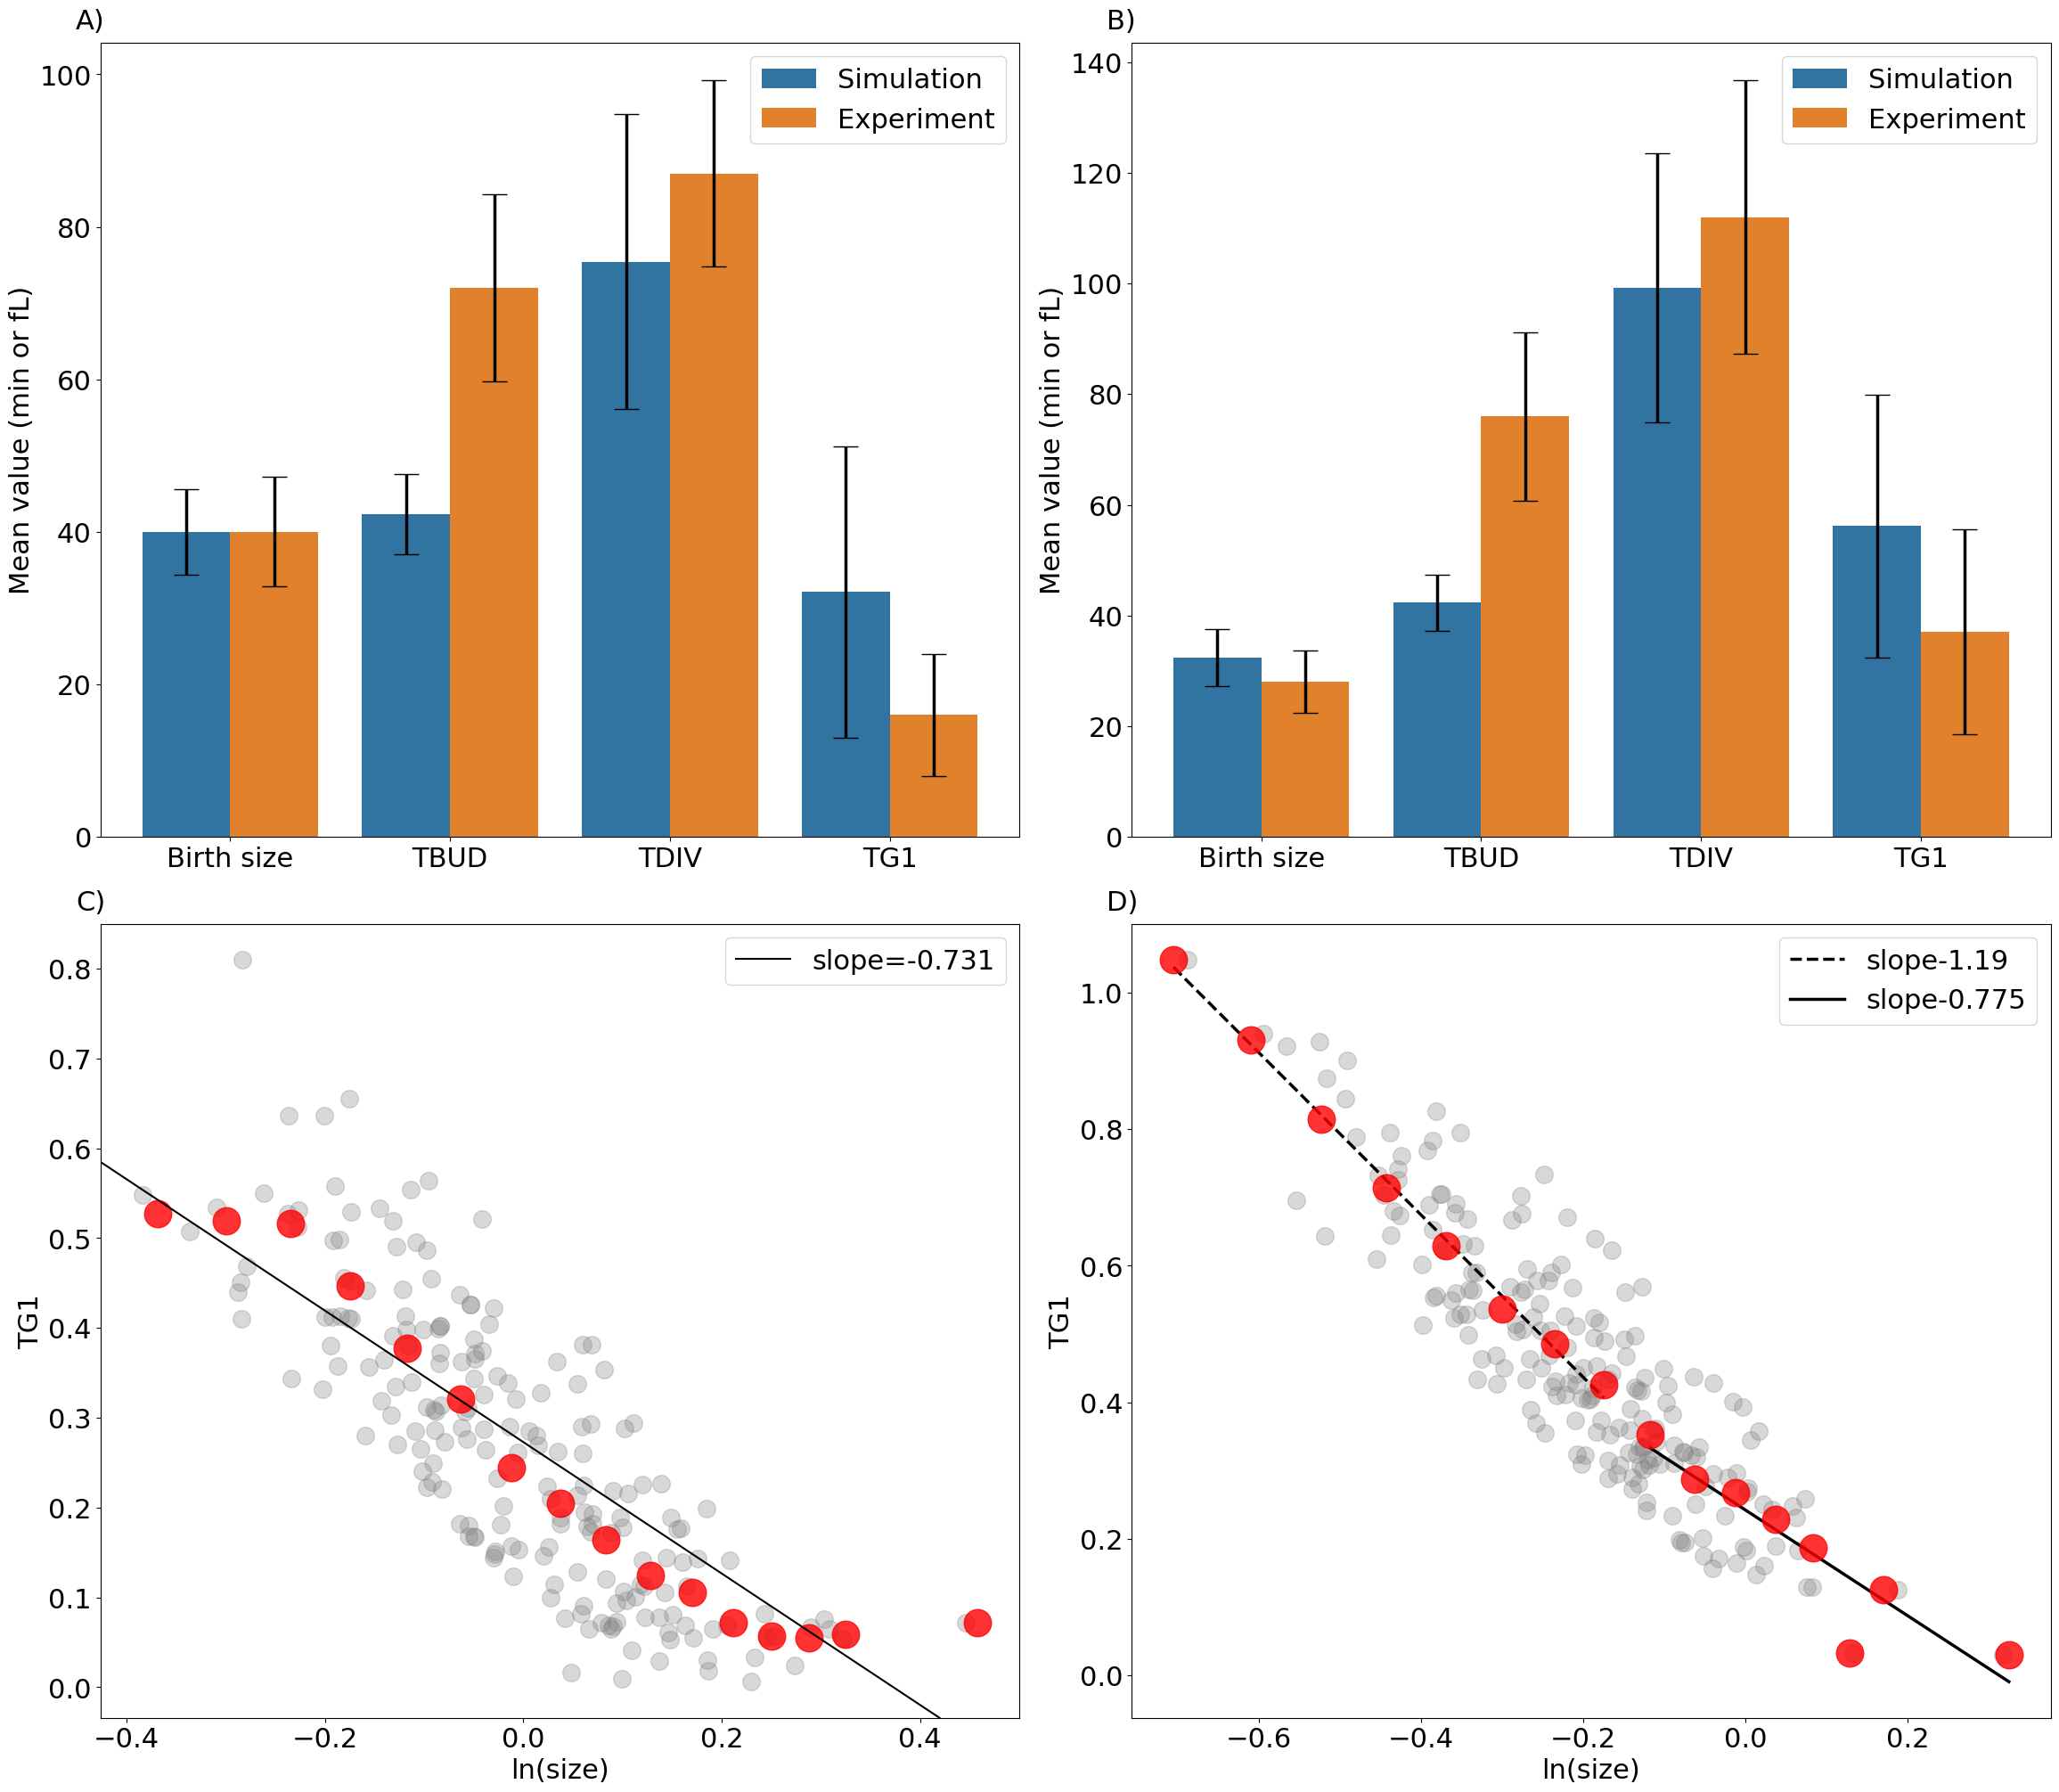

In [5]:
###### fig = plt.figure(layout= 'constrained', figsize=(23,20))
XX=22
fig = plt.figure(layout= 'constrained', figsize=(23,20))
axs = fig.subplot_mosaic([['A)', 'B)'],['C)','D)']])

##### plot 1 ########
num_hues = len(np.unique(cdf['type']))
ax = sns.barplot(data=cdf, x='name', y='mean', hue='type',ax=axs['A)'])
ax.legend_.set_title(None)
ax.legend(prop={'size': XX})
axs['A)'].set_xlabel("")
axs['A)'].set_ylabel("Mean value (min or fL)",fontsize = XX)
axs['A)'].tick_params(labelsize=XX)
for (hue, df_hue), dogde_dist in zip(cdf.groupby('type'), np.linspace(0.4, -0.4, 2 * num_hues + 1)[1::2]):
    bars = ax.errorbar(data=df_hue, x='name', y='mean', yerr='sd', color='grey')
    xys = bars.lines[0].get_xydata()
    bars.remove()
    ax.errorbar(data=df_hue, x=xys[:, 0] + dogde_dist, y='mean', yerr='sd', ls='',capsize=10, lw=2.5, color='black')

##### plot 2 ########
num_hues = len(np.unique(cdf_d['type']))
ax = sns.barplot(data=cdf_d, x='name', y='mean', hue='type',ax=axs['B)'])
ax.legend_.set_title(None)
ax.legend(prop={'size': XX})
axs['B)'].set_xlabel("")
axs['B)'].set_ylabel("Mean value (min or fL)",fontsize = XX)
axs['B)'].tick_params(labelsize=XX)
for (hue, df_hue), dogde_dist in zip(cdf_d.groupby('type'), np.linspace(0.4, -0.4, 2 * num_hues + 1)[1::2]):
    bars = ax.errorbar(data=df_hue, x='name', y='mean', yerr='sd', color='grey')
    xys = bars.lines[0].get_xydata()
    bars.remove()
    ax.errorbar(data=df_hue, x=xys[:, 0] + dogde_dist, y='mean', yerr='sd', ls='',capsize=10, lw=2.5, color='black')

    
##### plot 3 ########    
fl_ratio = 83.9559
mu=0.0077
with open('../data/join_M1.pickle', 'rb') as handle:
    join_M2 = pickle.load(handle)
np.random.seed(2)
xx = [_ for _ in range(len(join_M2))]
rx = np.random.choice(xx,200)
join_M = np.array(join_M2)[rx,:]
size_fl = np.array(join_M)[:,1]*fl_ratio
x = np.log(size_fl/np.mean(size_fl))
y = mu*np.array(join_M)[:,0]

# bin
bin_ = list(range(1,100,2))
dat_l = []
for j,k in enumerate(range(len(bin_)-1)):
    lower_ = bin_[j]
    upper_ = bin_[j+1]
    
    idx_ = np.where((size_fl >= lower_) & (size_fl <upper_))[0]
    
    if len(idx_) == 0:
        pass
    else:
        dat = np.array([np.mean(np.array(join_M)[idx_,0]),(lower_+upper_)/2])
        dat_l.append(dat)    
        
dat2 = np.array(dat_l)
xbin = np.log(dat2[:,1]/np.mean(size_fl))
ybin = mu*dat2[:,0]
model = sm.OLS(ybin, sm.add_constant(xbin))
results = model.fit()
b, m = results.params
axs['C)'].scatter(x,y,color="grey",alpha=0.3,s=200)
axs['C)'].plot(xbin,ybin,'o',color="red",alpha=0.8,markersize=XX)
axs['C)'].axline(xy1=(0, b), slope=m, label="slope="+str(round(m,3)),color="black")
axs['C)'].set_xlabel("ln(size)",fontsize = XX)
axs['C)'].set_ylabel("TG1",fontsize = XX)
axs['C)'].legend(prop={'size': XX})
axs['C)'].tick_params(labelsize=XX)

##### plot 4 ########    
with open('../data/join_D1.pickle', 'rb') as handle:
    join_D2 = pickle.load(handle)
    
np.random.seed(11)
xx = [_ for _ in range(len(join_D2))]
rx = np.random.choice(xx,200)
join_D3 = np.array(join_D2)[rx,:]
size_fl_D = np.array(join_D3)[:,1]*fl_ratio 
# bin
bin_ = list(range(1,100,2))
dat_l = []
for j,k in enumerate(range(len(bin_)-1)):
    lower_ = bin_[j]
    upper_ = bin_[j+1]
    
    idx_ = np.where((size_fl_D >= lower_) & (size_fl_D <upper_))[0]
    
    if len(idx_) == 0:
        pass
    else:
        dat = np.array([np.mean(np.array(join_D3)[idx_,0]),(lower_+upper_)/2])
        dat_l.append(dat)    
        
dat2 = np.array(dat_l)
#

x_c = np.log(dat2[:,1]/np.mean(size_fl))
y_c = mu*dat2[:,0]

idx_upper = int(np.ceil(len(y_c)/2))

#upper chunk
uyc = y_c[:idx_upper]
uxc = x_c[:idx_upper]
model_upper = sm.OLS(uyc, sm.add_constant(uxc))
results_upper = model_upper.fit()
bu_, mu_ = results_upper.params
f = lambda x: mu_*x + bu_
x_ = np.array([np.min(uxc),np.max(uxc)])

#lower chunk
uyc2 = y_c[idx_upper:]
uxc2 = x_c[idx_upper:]
model_lower = sm.OLS(uyc2, sm.add_constant(uxc2))
results_lower = model_lower.fit()
bu_2, mu_2 = results_lower.params
f2 = lambda x: mu_2*x + bu_2
x_2 = np.array([np.min(uxc2),np.max(uxc2)])


x = np.log(size_fl_D/np.mean(size_fl))
y = mu*np.array(join_D3)[:,0]
axs['D)'].scatter(x,y,color="grey",alpha=0.3,s=200)
axs['D)'].plot(x_,f(x_),'--',lw=2.5,label="slope"+str(round(mu_,3)),color="black")
axs['D)'].plot(x_2,f2(x_2),'-',lw=2.5,label="slope"+str(round(mu_2,3)),color="black")
axs['D)'].plot(x_c,y_c, 'o',color="red",alpha=0.8,markersize=XX)
axs['D)'].set_xlabel("ln(size)",fontsize = XX)
axs['D)'].set_ylabel("TG1",fontsize = XX)
axs['D)'].legend(prop={'size': XX})
axs['D)'].tick_params(labelsize=XX)


for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=XX, va='bottom')

plt.savefig('../figures/Fig3.pdf',format="pdf", bbox_inches="tight")
plt.show()